# Chapter 1: Introduction

Learn about the promise and challenges of deep learning in biology. You will be walked through practical questions to consider before launching a new project—like what your model could replace, whether deep learning is even necessary, and how to structure your workflow. This chapter also includes a short technical introduction covering JAX/Flax, Python patterns common in machine learning, working environments, and practical setup tips.

---

## Table of Contents

---

## Using Code Examples

Supplemental material (code examples, exercises, etc.) is available for download at https://github.com/deep-learning-for-biology.

---

## Getting Started
Before jumping into code, we walk through how to frame a project, evaluate your data, and avoid common pitfalls. A bit of structure and planning up front will make your work more reproducible, more flexible, and ultimately more useful and impactful.

---

### Deciding What Your Model Will Replace

This section from the introductory chapter focuses on the strategic framing of biological deep learning projects, arguing that defining the "real-world" target of a model is more critical than the initial choice of architecture. Here are key summary points:

* **Avoid the "Tinker Trap":** Deep learning in biology is intellectually stimulating, which often leads researchers to spend excessive time on technical minutiae. To remain focused, one must identify the existing process the model is intended to replace or improve.
* **Domain-Specific Impact Areas:**
    * **Healthcare & Drug Discovery:** Models aim to replace slow or manual tasks such as dermatological diagnosis, culture-based pathogen detection, manual MRI tumor segmentation, and exhaustive wet-lab screening for drug-target interactions.
    * **Molecular Biology:** Computational tools like *AlphaFold* provide 3D protein structures that would otherwise require months of expensive X-ray crystallography or Cryo-EM. Other models act as digital alternatives to RNA-seq (gene expression) or manual variant interpretation.
    * **Ecology:** AI replaces labor-intensive field work, such as in-person biodiversity surveys (via acoustics) or manual crop scouting (via satellite/drone imagery), and offers non-invasive alternatives to physical animal tagging.
* **Quantifying Success:** Researchers should estimate the potential impact in terms of time, cost, or labor.
* **Innovation vs. Replacement:** Not all models replace old workflows. Some enable entirely new capabilities, such as generating *de novo* biological sequences or linking disparate data types that were previously incompatible. In these cases, success must be evaluated without established benchmarks.

---

### Determining Your Criteria for Success

Define success metrics early to avoid endless, unfocused experimentation and wasted time in deep learning projects.

**Five Types of Success Criteria:**

1. **Performance Metrics**
   - **Examples:** accuracy, AUC, F1 score
   - Goals may include matching human expert performance, achieving experimental correlation, or maintaining low false-positive rates

2. **Interpretability Requirements**
   - Focus on explainability and transparency of model decisions
   - Important for domain expert trust, calibrated uncertainty estimates, and understandable feature attributions

3. **Model Size and Inference Efficiency**
   - Critical for resource-constrained environments (smartphones, embedded devices)
   - Metrics include inference time, memory usage, energy consumption, and performance per FLOP (floating point operation)
   - May prioritize efficiency over raw accuracy for real-time applications

4. **Training Efficiency**
   - Relevant when compute resources are limited or in educational settings
   - May focus on CPU-compatible models rather than GPU-dependent ones
   - Prioritizes fast training and minimal hardware requirements

5. **Generalizability**
   - Aims for models that work across multiple datasets or tasks
   - Relevant for foundational models designed for broad applicability
   - Values flexibility and reusability over single-task optimization

**Key Takeaway:**
Establishing clear success criteria upfront helps determine when a project is complete and ensures efforts remain focused and realistic while balancing multiple objectives.

---


### Invest Heavily in Evaluations

Evaluation strategy should be a top priority from the start, not an afterthought. It guides the entire project and determines whether your work produces meaningful results.

**What Strong Evaluation Involves:**
- Defining precise measurement methods and metrics
- Establishing validation procedures
- Selecting appropriate baselines for comparison
- Creating a well-designed evaluation strategy before building models

**Benefits of Strong Evaluations:**
- Measure progress accurately
- Detect bugs in models or pipelines
- Estimate task difficulty
- Build intuition about the problem
- Provide a known point of comparison to assess if the model is learning meaningfully

**Recommended Time Allocation:**
A rough guideline for successful machine learning projects:
- **50%** - Designing evaluation strategies and running baselines
- **25%** - Curating or processing data
- **25%** - Model architecture development

Without good evaluations, you operate blindly — unable to determine if your model is improving, understand trade-offs, or verify meaningful learning is occurring.

**Key Takeaway:** Evaluation is not an end-stage activity. It should be designed at the beginning and used to guide decisions throughout the entire project lifecycle.

---

### Designing Baselines

This section explains the importance of **baselines** as practical evaluation tools in machine learning — simple methods that establish minimum performance thresholds to compare against more complex models.

#### Purpose of Baselines
- Measure progress and understand task difficulty
- Catch bugs early in model development
- Sometimes surprisingly competitive with complex models
- Signal when something is wrong if models can't beat them

#### Classification Baselines

1. **Random prediction**: Equal probability for all classes (zero information baseline)

2. **Weighted random prediction**: Sample proportional to class frequencies in training data (useful for imbalanced datasets)

3. **Majority class**: Always predict most common class (strong baseline for highly imbalanced problems)

4. **Nearest neighbor**: Predict label of most similar training example (effective for low-dimensional or structured data)

### Regression Baselines

1. **Mean/median prediction**: Always predict training set average or median

2. **Single-feature linear regression**: Fit line using strongest individual predictor (tests incremental value of complexity)

3. **K-nearest neighbor regression**: Average target values of k most similar examples

#### Domain-Specific Heuristics

- Apply simple rules based on domain knowledge
- Examples:
  - **Diagnostics:** threshold-based classification on biomarkers
  - **Medical imaging:** rank by average pixel intensity
  - **Genomics:** assign mutations to nearest gene

**Key Takeaway:** If your model can't beat basic baselines, investigate your data, features, or modeling approach before adding complexity.

---

### Time-Boxing Your Project

Time-boxing is the practice of setting a fixed, non-negotiable timeframe for a project or specific task. In deep learning research—where projects can become open-ended and "failed" experiments are common—this strategy ensures that even unsuccessful ideas provide value without draining unlimited resources.

#### Strategies for Effective Time-Boxing

* **Establish a Rigid Deadline:** Determine a realistic total duration for the project (e.g., two weeks or three months). The project should pause or stop once this limit is reached, regardless of whether the target metrics were achieved.
* **Define Clear Checkpoints:** Break the timeline into intermediate milestones to monitor progress. Key checkpoints might include:
    * Completion of data preprocessing.
    * Training and evaluation of a baseline model.
    * Reaching a specific performance threshold.
* **Micro Time-Boxing:** Apply the same principle to specific sub-tasks or experimental ideas. For example, allocate exactly one week to test a new model architecture; if it does not show improvement within that window, abandon it and move on.
* **Structured Reflection:** Use the end of the time-box to evaluate outcomes. Focus on what was learned and what technical insights can be applied to future work, transforming a "failed" project into a stepping stone.
* **Mitigate Scope Creep:** Guard against the urge to justify extensions or "one more tweak." When perfectionism or indecision stalls progress, consult with a mentor or collaborator to regain perspective and maintain focus on the broader goals.

**Key Takeaway:** Time-boxing is a tool for maintaining focus and avoiding burnout. It forces a decision-making point where you must evaluate the project's viability, ensuring that your energy is always directed toward the most promising research avenues.

---

### Deciding Whether You Really Need Deep Learning

While deep learning is a powerful tool in the biological sciences, it is not always the optimal solution. This section emphasizes the importance of evaluating whether a simpler, traditional approach can meet your project's goals more efficiently.

#### Key Considerations for Choosing Your Approach

* **Evaluate Simpler Alternatives:** Before committing to a deep learning architecture, consider if linear regression, decision trees, or basic statistical techniques are sufficient.
* **Implementation and Setup:** Traditional methods are generally quicker to implement, easier to set up, and require less specialized expertise to maintain.
* **Computational Efficiency:** Simpler models are far less resource-intensive. They can often run on standard hardware (CPUs) with minimal training time, whereas deep learning typically requires expensive GPU resources.
* **Interpretability and Debugging:** Deep learning models are notoriously "black boxes" and difficult to troubleshoot. Simpler methods are often easier to explain to stakeholders, troubleshoot for errors, and validate against biological ground truth.
* **Weighted Trade-offs:** The smarter path is often the one that delivers the required performance with the least amount of complexity. If a traditional method provides the necessary insights, the overhead of deep learning may not be justified.

**Key Takaway:** The decision to use deep learning should be based on necessity rather than novelty. Prioritizing simplicity when possible leads to more robust, interpretable, and cost-effective biological research.

---

### Ensuring That You Have Enough Good Data

In the context of biological deep learning, where data acquisition can be expensive and prone to technical noise, the mantra of "garbage in, garbage out" is particularly relevant. This section highlights that the sophistication of your model cannot compensate for poor underlying data.

#### Critical Data Requirements

* **Sufficient Quantity:** Deep learning models generally require thousands of labeled examples to generalize effectively.
    * **Benchmarking:** Consult existing literature to determine the standard dataset size for your specific biological task.
    * **Transfer Learning:** If your dataset is small (e.g., a rare disease cohort), use transfer learning. Start with a model pre-trained on a massive, related dataset (like ImageNet for microscopy or UniProt for protein sequences) and fine-tune it on your specific data.
* **Sufficient Quality:** The reliability of your model is capped by the cleanliness and consistency of your data.
    * **Error Impact:** Inconsistent labeling or high levels of experimental noise can cause models to fail catastrophically.
    * **Curation:** High-quality, curated data is often more valuable than a larger volume of "noisy" data. Prioritizing rigorous quality control (QC) and thoughtful curation is essential for building trustworthy models.

**Key Takeaway:** Success in deep learning is a balance between scale and precision. While you need enough data to capture biological variance, that data must be clean enough for the model to learn meaningful patterns rather than experimental artifacts.

---

### Assembling a Team

Collaborating effectively is a catalyst for success in biological deep learning, where the complexity of the data often requires a blend of computational and experimental expertise.

#### Strategies for Finding and Building a Team

* **Engage with Digital Communities:** Use platforms like Reddit, Discord, X, and specialized Slack groups to share ideas and meet potential partners.
* **Participate in Structured Challenges:** Join hackathons or competitions on platforms like Kaggle or Zindi to meet people with shared interests and receive immediate feedback.
* **Prioritize Interdisciplinary Diversity:** Aim for a "cross-pollination" of skills. Biologists should seek out machine learning experts, and vice versa, to ensure the model is both mathematically sound and biologically relevant.
* **Consult Domain Experts:** Reach out to authors of relevant papers or attendees at conferences. Genuine interest in a specific biological problem often leads to successful "cold" outreach and expert guidance.

#### Best Practices for Effective Collaboration

* **Establish Clear Governance:** Define specific roles, responsibilities, and decision-making processes early to prevent misunderstandings and scope creep.
* **Utilize a Shared Tech Stack:** Implement collaborative tools such as:
    * **Version Control:** Git for code management.
    * **Shared Environments:** Google Colab for interactive modeling.
    * **Task Tracking:** Notion, Trello, or simple shared documents to organize workflows.
* **Encourage Specialization:** Allow team members to focus on their strengths, whether that is data engineering, infrastructure, modeling, or biological interpretation.
* **Pilot the Partnership:** Start with a small, low-pressure "sprint" or exploration to test compatibility before committing to a long-term research project.

**Key Takeaway:** While solo research is possible, interdisciplinary teams often produce more robust and innovative results. By combining deep domain knowledge with technical ML expertise and using structured communication tools, you can significantly accelerate the "Get Started" phase of your project.

---

### You Don't Need a Supercomputer or a PhD

It is a common misconception that deep learning in biology is reserved for those with elite credentials or massive infrastructure. In reality, the field is increasingly accessible to anyone with curiosity and a laptop.

#### Challenging Common Misconceptions

* **The "Huge Compute" Myth:** You do not need a supercomputer to make a meaningful impact.
    * **Iterative Prototyping:** Start with small, lightweight models to test ideas quickly before scaling up.
    * **Accessible Hardware:** Utilize free GPU resources from platforms like **Google Colab** or **Kaggle**. For larger tasks, scalable cloud instances (AWS, GCP, Azure) allow you to pay only for what you use.
    * **Analysis over Training:** Significant research involves analyzing or fine-tuning existing models rather than training them from scratch, which requires much less computational power.
* **The "Expert-Only" Myth:** You do not need a PhD in both ML and Biology to contribute.
    * **Modern Tooling:** High-level frameworks (like PyTorch or JAX) have lowered the barrier to entry for building complex architectures.
    * **Open Source Ecosystem:** Leverage pre-trained models and open-source codebases to build upon the work of others.
    * **Abundant Learning Resources:** Tutorials, walkthroughs, and videos offer accessible pathways to mastering the necessary concepts outside of traditional academia.
    * **Uncharted Problems:** Many biological questions have yet to be approached with a machine learning lens, leaving plenty of room for newcomers to find niche areas of discovery.

**Key Takeaway:** The barrier to entry for biological deep learning is lower than it has ever been. By starting small, utilizing free resources, and leveraging the open-source community, you can contribute to the field regardless of your current budget or formal title.

---

## Technical Introduction

This section introduces the specific software ecosystem used in the book—**JAX** and **Flax**—and explains the rationale for choosing these tools for biological deep learning projects.

### The JAX and Flax Ecosystem

* **JAX:** A system for high-performance numerical computing that transforms Python and NumPy code into optimized machine code for accelerators (GPUs/TPUs).
* **Flax:** A flexible neural network library designed specifically to run on top of JAX.
* **`dlfb` (Deep Learning for Biology):** A custom companion library provided with the book to handle common utilities and repetitive tasks (https://github.com/deep-learning-for-biology/dlfb.git).

---

### Why Use JAX and Flax for Biology?

* **Familiarity:** JAX uses the `jax.numpy` ($jnp$) API, which is almost identical to standard NumPy, making the transition seamless for those already doing scientific computing in Python.
* **Functional Clarity:** JAX follows a "pure function" style. This explicit approach reduces hidden states, making the underlying math of biological models easier to understand and debug.
* **First-Class Transformations:** JAX offers powerful, composable tools:
    * `jit`: Just-In-Time compilation via the XLA (Accelerated Linear Algebra) compiler for speed.
    * `grad`: Automatic differentiation for calculating gradients.
    * `vmap`: Automatic vectorization to handle batches of data (like thousands of protein sequences) without manual loops.
* **Research Alignment:** JAX is the preferred tool for modern "AI for Science" research, including major breakthroughs like AlphaFold.

#### Trade-offs and Considerations

* **Learning Curve:** JAX requires a shift toward functional programming, which may feel different than the object-oriented approach of PyTorch.
* **Ecosystem Size:** The JAX community is smaller than PyTorch's, and APIs (like the shift from Flax `linen` to the newer `nnx`) can evolve quickly.
* **Framework Interoperability:** The book occasionally uses **PyTorch** (e.g., for Hugging Face model embeddings) because certain tools are more mature in that ecosystem.

#### Advanced Performance Optimization

While the book focuses on clarity, it identifies four key areas for scaling real-world biological models:

* **Numerical Precision:** Using formats like $bfloat16$ to speed up matrix multiplications on specialized hardware (Tensor Cores).
* **Profiling:** Using tools like `jax.profiler` to identify computational and memory bottlenecks.
* **Memory Efficiency:** Using **gradient checkpointing** (`remat`) to train deeper models by trading computation for memory.
* **Distributed Training:** Scaling models across multiple GPUs or TPUs for massive datasets.

**Key Takeaway:** Choosing JAX and Flax aligns your work with the "bleeding edge" of biological research while providing a transparent, mathematically grounded framework for learning.

For those seeking a deeper technical dive or troubleshooting support, the text recommends two specific JAX resources:
* **Official JAX Tutorials:** The primary source for detailed, hands-on learning and practical application of the framework (https://docs.jax.dev/en/latest/notebooks/thinking_in_jax.html).
* **The "Sharp Bits" Notebook:** An essential reference guide that documents common pitfalls and non-intuitive behaviors unique to JAX's functional programming model (https://docs.jax.dev/en/latest/notebooks/Common_Gotchas_in_JAX.html).

---

### Python tips

This section covers essential Python concepts frequently encountered in machine learning code, particularly with JAX and Flax frameworks.

#### 1. Type Annotations and Docstrings

Python is dynamically typed, which is flexible but can hide bugs. Type annotations improve readability, enable static type checking (mypy) or Vs Code's Pylance, and simplify debugging.

```python
import numpy as np

# Basic function without type hints
def mean_squared_error(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    return np.mean(squared_errors)

# Improved function with type hints and docstring
def mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Squared Error (MSE) between two NumPy arrays.
    
    Args:
        y_true (np.ndarray): Ground-truth values.
        y_pred (np.ndarray): Predicted values.
    Return:
        float: The mean squared error.
    """
    squared_errors = (y_true - y_pred) ** 2
    return np.mean(squared_errors)

```

**Benefits:**
- Clarifies input/output types
- Enhances IDE documentation and autocomplete
- Improves code readability
- Enables static type checking with tools like mypy

In [1]:
import numpy as np


def mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Squared Error (MSE) between two NumPy arrays.
    
    Args:
        y_true (np.ndarray): Ground-truth values.
        y_pred (np.ndarray): Predicted values.
    Return:
        float: The mean squared error.
    """
    squared_errors = (y_true - y_pred) ** 2
    return np.mean(squared_errors)

# How to print the docstring of the function 
help(mean_squared_error)

Help on function mean_squared_error in module __main__:

mean_squared_error(y_true: numpy.ndarray, y_pred: numpy.ndarray) -> float
    Calculate the Mean Squared Error (MSE) between two NumPy arrays.
    
    Args:
        y_true (np.ndarray): Ground-truth values.
        y_pred (np.ndarray): Predicted values.
    Return:
        float: The mean squared error.



---

#### 2. Decorators

Decorators are functions that modify the behavior of other functions, commonly used for performance enhancement, caching, or logging.

For example, JIT compilation with JAX (`@jax.jit`) is a decorator (see codes in below cell)

**How `@jax.jit` works:**
1. Traces the function using special tracer objects (not real data)
2. Builds a computation graph (static representation of operations)
3. Compiles via XLA (Accelerated Linear Algebra) to optimized machine code
4. Caches compiled version for reuse with same input shapes/types
5. Results in ~20x speedup on GPU

**JIT Debugging Challenges:**
- `print()` statements and `pdb` don't work as expected
- Side effects are skipped during tracing
- Cryptic error messages referencing internal JAX/XLA code

**Solution**: Set environment variable `JAX_DISABLE_JIT=True` to globally disable JIT for debugging or you may set directly in your Python code:

```python
import jax
jax.config.update("jax_disable_jit", True)

def f(x):
    y = jnp.log(x)
    if jnp.isnan(y):
        breakpoint()
    return y

jax.jit(f)(-2.)  # ==> Enters PDB breakpoint!

```

**Strengths and limitations of `jax_disable_jit`**
* **Strengths:**
    * Easy to apply
    * Enables use of Python’s built-in `breakpoint` and `print`
    * Throws standard Python exceptions and is compatible with PDB postmortem
* **Limitations:**
    * Running functions without JIT-compilation can be slow

See the [JAX debugging documentation](https://docs.jax.dev/en/latest/debugging/flags.html#jax-disable-jit-configuration-option-and-context-manager) for more details:

In [2]:
import jax 
import jax.numpy as jnp


arr = jnp.array([1, 2, 3, 4, 5])

# Basic function
def compute_ten_power_sum(arr: jax.Array) -> float:
    """Raise values to the power of 10 and then sum."""
    return jnp.sum(arr**10)
# No JIT compilation
%time print(f'No JIT output: {compute_ten_power_sum(arr)}')

# Method 1 - Apply JIT directly
jitted_compute_ten_power_sum = jax.jit(compute_ten_power_sum)
# first call (compilation time) takes longer
%time print(f'Jitted function output: {jitted_compute_ten_power_sum(arr)}')

# Method 2 - Use decorator syntax
@jax.jit
def compute_ten_power_sum(arr: jax.Array) -> float:
    """Raise values to the power of 10 and then sum."""
    return jnp.sum(arr**10)
# first call (compilation time) takes longer
%time print(f'Decorator function output: {compute_ten_power_sum(arr)}')
%time print(f'Subsequent call: {compute_ten_power_sum(arr)}')

No JIT output: 10874275
CPU times: user 37.4 ms, sys: 3.03 ms, total: 40.4 ms
Wall time: 39.9 ms
Jitted function output: 10874275
CPU times: user 21.9 ms, sys: 24 μs, total: 21.9 ms
Wall time: 21.3 ms
Decorator function output: 10874275
CPU times: user 17.1 ms, sys: 2.01 ms, total: 19.1 ms
Wall time: 18.9 ms
Subsequent call: 10874275
CPU times: user 88 μs, sys: 0 ns, total: 88 μs
Wall time: 91.3 μs


In [3]:
@jax.jit
def compute_ten_power_sum(arr: jax.Array) -> float:
    """Computes the sum of 10 raised to the power of each element in the input array."""
    return jnp.sum(arr ** 10)

arr = jnp.array([1, 2, 3, 4, 5])
%time print(compute_ten_power_sum(arr)) # first call (compilation time) takes longer
%time print(compute_ten_power_sum(arr)) # subsequent calls are faster

arr = jnp.array([5, 4, 3, 2, 1])
%time print(compute_ten_power_sum(arr)) # if array shape/dtype is the same, no recompilation

arr = jnp.array([5, 4, 3, 2])
%time print(compute_ten_power_sum(arr)) # different shape, triggers recompilation

10874275
CPU times: user 21.2 ms, sys: 2.03 ms, total: 23.2 ms
Wall time: 22.3 ms
10874275
CPU times: user 305 μs, sys: 0 ns, total: 305 μs
Wall time: 278 μs
10874275
CPU times: user 111 μs, sys: 0 ns, total: 111 μs
Wall time: 115 μs
10874274
CPU times: user 19.6 ms, sys: 814 μs, total: 20.4 ms
Wall time: 20.2 ms


In [3]:
import jax
import pdb

jax.config.update("jax_disable_jit", True)

def f(x):
    y = jnp.log(x)
    if jnp.isnan(y):
        pdb.set_trace()
    return y

jax.jit(f)(-2.)  # ==> Enters PDB breakpoint!

> /tmp/ipykernel_10342/2073816543.py(10)f()
      8     if jnp.isnan(y):
      9         pdb.set_trace()
---> 10     return y
     11 
     12 jax.jit(f)(-2.)  # ==> Enters PDB breakpoint!



#### Bonus: More about JIT compilation

The term **"Just-in-Time" (JIT)** refers to the exact moment the compilation happens. In traditional programming languages (like C++ or Fortran), compilation happens before you ever run the program. In JAX, the compilation happens *while the program is running*, specifically the very first time a function is called.

Here is a breakdown of why this distinction matters and how it works:

##### 1. The Timing: A "Late" Compilation

In a standard "Ahead-of-Time" (AOT) workflow, you compile your code into a binary file, and then you run that file. In JAX, you provide a Python function, and the "Just-in-Time" compiler stays idle until you actually trigger that function with real data.
* **Step 1:** You define the function.
* **Step 2:** You call the function with an input of a specific shape (e.g., a protein sequence of length $L = 500$).
* **Step 3 (The "Just-in-Time" part):** JAX realizes it doesn't have a compiled version for that specific input shape yet. It pauses, converts the Python code into an optimized XLA kernel, and then executes it.

##### 2. Tracing:

The reason JAX waits until the "last second" (Just-in-Time) is because it needs to see the **shapes** and **types** of your data to optimize effectively. This process is called **Tracing**.

When you call a JIT-ed function, JAX sends "abstract" versions of your data through the function to see what happens. It records every operation (+, −, ×, ÷) to create a **StableHLO** (a high-level intermediate representation). By waiting until you provide data, JIT can:
* See that your matrix is $1000 \times 1000$.
* Optimize the machine code specifically for those dimensions.

##### 3. Specialization

If you call the same function later with a *different* shape (e.g., a sequence of length $L=200$), JAX will compile it again, "Just-in-Time" for that new shape. It builds a library of specialized versions of your function in the background.

##### Summary of Comparison of different compilation methods

| Feature | Interpreted (Python/NumPy) | Ahead-of-Time (C++/Fortran) | Just-in-Time (JAX/XLA) |
| --- | --- | --- | --- |
| **When is it compiled?** | Never (translated line-by-line) | Before the program runs | During execution (on first call) |
| **Performance** | Slow (High overhead) | Very Fast | Very Fast |
| **Flexibility** | High | Low (must re-compile manually) | High (auto-specializes to shapes) |

##### Why this is a "Scientific" Advantage

In biological modeling, we often deal with variable-sized inputs (different DNA lengths, different number of atoms in a molecule). JIT allows us to write flexible Python code that feels "easy," while the compiler works "Just-in-Time" to give us the speed of a low-level language like C++.

---

#### 3. Preconfiguring JAX JIT with `partial`

`functools.partial` prefills/binds arguments to create new functions with fixed values, a general utility in Python.

**Basic example:**

```python
from functools import partial

def scale(x, scaling_factor):
    return x * scaling_factor

# Create new function with scaling_factor fixed to 10
scale_by_10 = partial(scale, scaling_factor=10)
scale_by_10(3)
# Output: 30

```

Here, `scale_by_10` is a new function that behaves like `scale(x, 10)`.


**JAX-specific usage with static arguments:**

In the context of JAX, `partial` is often used to customize a decorator before applying it, like this: `@partial(jax.jit, static_argnums=...)`. This is a way to configure the `jax.jit` decorator itself.

```python
from functools import partial
import jax
import jax.numpy as jnp

@partial(jax.jit, static_argnums=(0,))
def summarize(average_method: str, x: jax.Array) -> float:
    if average_method == "mean":
        return jnp.mean(x)
    elif average_method == "median":
        return jnp.median(x)
    else:
        raise ValueError(f"Unsupported average type: {average_method}")

data_array = jnp.array([1.0, 2.0, 100.0])

# JAX compiles one version for average_method="mean"
print(f"Mean: {summarize('mean', data_array)}")

# JAX compiles another version for average_method="median"
print(f"Median: {summarize('median', data_array)}")

# Calling with "mean" again uses cached compiled version
print(f"Mean again: {summarize('mean', data_array)}")

# Output:
# Mean: 34.333335876464844
# Median: 2.0
# Mean again: 34.333335876464844
```

If we didn’t mark `average` as static with `static_argnums=(0,)`, JAX would throw an error, because it can’t trace control flow that depends on strings unless it knows their value ahead of time. Marking arguments as static tells JAX to compile a separate, specialized version of the function for each unique value of that static argument it encounters.

**Static vs Dynamic arguments:**

* **Dynamic**: Numerical inputs (`jax.Array`, `float`, `int`) - can vary without recompilation if shapes/types remain constant.
* **Static**: Strings, Python objects, functions - affect control flow; must mark with `static_argnums` or `static_argnames` or use closures (see next section).

In [4]:
from functools import partial
import jax
import jax.numpy as jnp

jax.config.update("jax_disable_jit", False)

# @partial(jax.jit, static_argnums=(0,)) # using deprecated static_argnums
@partial(jax.jit, static_argnames=("average_method",)) # using static_argnames
def summarize(average_method: str, x: jax.Array) -> float:
    if average_method == "mean":
        return jnp.mean(x)
    elif average_method == "median":
        return jnp.median(x)
    else:
        raise ValueError(f"Unknown average method: {average_method}")
    
arr = jnp.array([1, 2, 3, 4, 5])
%time print(summarize("mean", arr))  # JIT compilation for "mean"
%time print(summarize("mean", arr))  # Subsequent call for "mean"
%time print(summarize("median", arr))  # JIT compilation for "median"
%time print(summarize("median", arr))  # Subsequent call for "median"

3.0
CPU times: user 22.5 ms, sys: 3.76 ms, total: 26.2 ms
Wall time: 25.9 ms
3.0
CPU times: user 210 μs, sys: 0 ns, total: 210 μs
Wall time: 222 μs
3.0
CPU times: user 64.4 ms, sys: 8.12 ms, total: 72.5 ms
Wall time: 50.8 ms
3.0
CPU times: user 96 μs, sys: 10 μs, total: 106 μs
Wall time: 109 μs


In [ ]:
@jax.jit
def summarize_2(average_method: str, x: jax.Array) -> float:
    if average_method == "mean":
        return jnp.mean(x)
    elif average_method == "median":
        return jnp.median(x)
    else:
        raise ValueError(f"Unknown average method: {average_method}")

arr = jnp.array([1, 2, 3, 4, 20])
%time print(summarize_2("mean", arr))

CPU times: user 19 μs, sys: 901 μs, total: 920 μs
Wall time: 796 μs


TypeError: Error interpreting argument to <function summarize_2 at 0x768d6c4d1d00> as an abstract array. The problematic value is of type <class 'str'> and was passed to the function at path average_method.
This typically means that a jit-wrapped function was called with a non-array argument, and this argument was not marked as static using the static_argnums or static_argnames parameters of jax.jit.

---

#### 4. Closures

In Python, a **closure** is a function object that "remembers" values in the enclosing scope even if they are no longer present in memory.

For a closure to exist, three conditions must be met:
1. There must be a **nested function** (a function inside a function).
2. The nested function must refer to a value defined in the **enclosing function**.
3. The enclosing function must return the nested function.

**Example:**

```python
def outer_function(x):
    def inner_function(y):
        return x + y  # inner_function "closes over" x
    return inner_function

add_five = outer_function(5)  # x is 5
result = add_five(10)  # y is 10
print(f"Closure result: {result}")
# Output: Closure result: 15
```

#### The `nonlocal` Keyword 

By default, a closure can read the outer variable but cannot modify it. If you want to change a variable in the enclosing scope, you must use the `nonlocal` keyword. This is common for creating "counters" or "accumulators."

```python
def make_counter():
    count = 0
    def increment():
        nonlocal count  # Allows modification of the outer 'count'
        count += 1
        return count
    
    return increment

counter_a = make_counter()
print(counter_a())  # Output: 1
print(counter_a())  # Output: 2

counter_b = make_counter()
print(counter_b())  # Output: 1 (Starts its own separate count)

```

#### Why use Closures?

In machine learning (and especially in JAX), closures are powerful for:

* **Data Hiding:** They provide a way to store state without using a full Class object.
* **Function Factories:** You can generate specialized versions of a function (like a specific loss function with fixed hyperparameters).
* **Decorators:** Closures are the underlying mechanism that makes Python decorators work.

### Comparison to Classes

If you only have one method in a class, a closure is often a more elegant, lightweight, and memory-efficient solution.

| Feature | Closure | Class |
| --- | --- | --- |
| **Setup** | Lightweight (function) | Heavier (object + methods) |
| **State** | Fixed via "backpack" | Mutable via `self` |
| **Usage** | Functional programming | Object-Oriented programming |

In [5]:
# Example 1 
def outer_function(x: float):
    def inner_function(y: float):
        return y + x
    return inner_function


add_five = outer_function(5.0)
print(add_five(3.0))  # Outputs 8.0
print(add_five.__closure__[0].cell_contents)  # Inspect closure to see captured variables
print(add_five)


# Example 2
def make_counter():
    count = 0
    def counter():
        nonlocal count
        count += 1
        return count
    return counter
counter = make_counter()
print(counter())  # Outputs 1
print(counter())  # Outputs 2

8.0
5.0
<function outer_function.<locals>.inner_function at 0x7e9fd82ccb80>
1
2


---

#### 5. Generators

Iterates over data lazily (one item at a time) - essential for large datasets that don't fit in memory.

**Simple generator:**

```python
from typing import Iterator

def data_generator() -> Iterator[dict]:
    """Yield data samples with features and labels."""
    for i in range(5):
        yield {"feature": i, "label": i % 2}

# Example usage
generator = data_generator()
next(generator)
# Output: {'feature': 0, 'label': 0}
```

**Integration with TensorFlow Datasets (TFDS):**

```python
import tensorflow as tf

features = np.array([1, 2, 3, 4, 5])
labels = np.array([0, 1, 0, 1, 0])

# Create TensorFlow dataset from NumPy arrays
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

# Batch with size 2, drop incomplete final batch
batched_dataset = dataset.batch(2, drop_remainder=True)

# Create iterator and retrieve first batch
ds = iter(batched_dataset)
next(ds)
# Output:
# (<tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 2])>,
#  <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>)
```

**Why TFDS with JAX?**
- JAX lacks native data-loading library
- TFDS provides clean API for batching, shuffling, and prefetching
- Custom pipelines offer more control (covered in later chapters)

In [6]:
from typing import Iterator

def data_generator() -> Iterator[dict]:
    """Yield data samples with features and labels."""
    for i in range(5):
        yield {"feature": i, "label": i % 2}

# Example usage
generator = data_generator()
print(next(generator))
# Output: {'feature': 0, 'label': 0}
print(next(generator))
# Output: {'feature': 1, 'label': 1}

{'feature': 0, 'label': 0}
{'feature': 1, 'label': 1}


In [ ]:
import tensorflow as tf
import jax.numpy as jnp

features = jnp.array([1, 2, 3, 4, 5])
labels = jnp.array([0, 0, 1 , 1, 0])

dataset = tf.data.Dataset.from_tensor_slices((features, labels))

batched_dataset = dataset.batch(2, drop_remainder=True)

ds = iter(batched_dataset)
try:
    print(next(ds))
    print(next(ds))
    print(next(ds))
except StopIteration:
    print("End of dataset reached.")

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 0], dtype=int32)>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1], dtype=int32)>)
End of dataset reached.


---

### Anatomy of a Training Loop with JAX/Flax

The core structure of training a model remains fairly consistent in machine learning projects. Here are the list of core steps when you are trainining a model:
1. Defining a dataset
2. Defining a model
3. Creating a training state
4. Defining a loss function
5. Defining the training step
6. Handling auxilary outputs in the loss function
7. Defining the training loop

In the following section, we will go through each step with a working example:

#### 1. Defining a dataset

Let's create a dataset with a linear relationship between the feature $x$ and the label $y$. We will use JAX random generator to add noise to the data.

**Note on randomness in JAX:** In JAX, randomness is handled differently than in standard NumPy or PyTorch. Because JAX is functional and deterministic, it uses *Explicit Pseudo-Random Number Generation (PRNG)*. This means you must manually manage and "pass" the state of the random number generator.

* **Initializing the Key:**

    ```python
    rng = jax.random.PRNGKey(42)

    ```
    Above code creates a "seed" or a master key. In JAX, the `rng` (Random Number Generator) state is an array of *two integers*. Unlike `np.random.seed()`, which sets a global hidden state, JAX requires this explicit key to ensure that if you run the same code twice, you get the exact same results (reproducibility).

* **Splitting the Key:**

    ```python
    rng, rng_data, rng_noise = jax.random.split(rng, 3)

    ```

    The above code "splits" the master key into three new, independent sub-keys. This is the most important rule in JAX: *Never reuse a key.* If you used the same `rng` to generate both your data and your noise, they would be correlated. The outputs of `split` in above code are:
    * `rng`: A new "lead" key to be used for future splits.
    * `rng_data`: A key specifically for generating the $x$ values.
    * `rng_noise`: A key reserved for generating noise to be added to the label.

In NumPy, the state is updated behind the scenes (mutated). In JAX, the state is passed explicitly (functional).

| Step | NumPy (Implicit) | JAX (Explicit) |
| --- | --- | --- |
| **Initialization** | `np.random.seed(42)` | `key = jax.random.PRNGKey(42)` |
| **State Update** | Automatic | `key, subkey = jax.random.split(key, 2)` |
| **Generation** | `np.random.uniform()` | `jax.random.uniform(subkey)` |

Master key: [ 0 42]
Master sub-key: [1832780943  270669613]
Data key: [  64467757 2916123636]
Noise key: [2465931498  255383827]


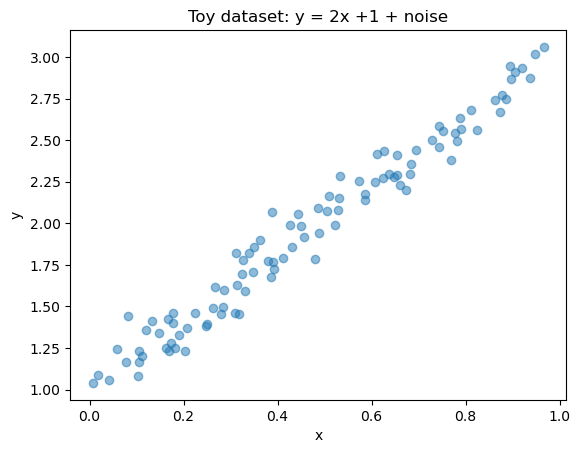

In [7]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt


# In JAX, randomness is handled explicitly by passing a random key.
# We create a key here to seed the random number generator.
rng = jax.random.PRNGKey(42)
print(f"Master key: {rng}")
rng, rng_data, rng_noise = jax.random.split(rng, 3)
print(f"Master sub-key: {rng}")
print(f"Data key: {rng_data}")
print(f"Noise key: {rng_noise}")

# Generate toy data: x values uniformly sampled between 0 and 1.
x_data = jax.random.uniform(rng_data, shape=(100, 1), minval=0.0, maxval=1.0) # Default range is [0,1]

# Generate Gaussian noise to be added to the data.
noise = jax.random.normal(rng_noise, shape=(100, 1)) * 0.1

# Define label (target): y = 2 * x + 1 + noise.
y_data = 2 * x_data + 1 + noise

# Visualize the data
plt.scatter(x_data, y_data, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Toy dataset: y = 2x +1 + noise')
plt.show()

#### 2. Defining a model

This section explains how to define and initialize a model using *Flax*, highlighting the library's functional design and its unique approach to parameter management.

* **Flax Modules**: Models are created by inheriting from `nn.Module`. Unlike PyTorch, these modules are stateless blueprints; they do not store the weights internally.
* **The `@nn.compact` Decorator**: This allows for "inline" layer definition. We can declare and use layers (like `nn.Dense`) directly within the `__call__` method, simplifying the code for sequential architectures. In the explicit style (Without `nn.compact` decorator), we define our sub-layers in `setup()` and then simply call them in `__call__()`. When the model is initialized in the dry-run, `setup()` is called first then `__call__()` is called.

    ```python
    class LinearModel(nn.Module):
        def setup(self):
            """Initializes the layers of the model explicitly.
            
            This method is called internally by Flax when the model is 
            initialized or applied for the first time.
            """
            # We define the layer as a class attribute here.
            # Note: We still don't define the input shape; 
            # Flax handles that during model.init()
            self.dense = nn.Dense(features=1)

        def __call__(self, x):
            """Defines the forward pass using pre-defined layers.
            
            Args:
                x: Input data array.
                
            Returns:
                The output of the dense layer.
            """
            # We simply reference the attribute defined in setup.
            return self.dense(x)
        
    ```


* **Lazy Shape Inference**: Flax doesn't know the dimensions of your weights (the `kernel` and `bias`) until you provide a sample input. This "just-in-time" shape inference provides more control and clarity during JAX transformations.
* **Parameter Initialization**: Using `model.init()`, Flax generates a nested dictionary (often called `variables` or `params`) containing the actual numerical arrays for the weights.

##### Comparison: Flax vs. Object-Oriented Frameworks

| Feature | Flax (Functional) | PyTorch/Keras (OO) |
| --- | --- | --- |
| **State Storage** | Parameters stored in a separate dict | Parameters stored inside the Layer object |
| **Shape Definition** | Inferred during `.init()` call | Usually defined during instantiation |
| **Architecture** | Explicit and JIT-friendly | Automatic and state-heavy |

Here’s a minimal example, a single linear (dense) layer with one output unit and no activation function:

In [8]:
from flax import linen as nn


# 1. Define the model architecture.
class LinearModel(nn.Module):
    # The @nn.compact decorator allows you to define parameters 
    # (like nn.Dense) inside the __call__ method.
    @nn.compact
    def __call__(self, x):
        # Creates a dense layer with 1 output unit.
        # Computes y = xW + b. 
        # On the first call, it uses 'x' to figure out the input shape.
        return nn.Dense(features=1)(x)

# 2. Instantiate the blueprint.
# This doesn't create weights yet; it just creates the model structure.
model = LinearModel()

# 3. Setup Randomness.
# JAX requires explicit PRNG keys for initialization.
rng = jax.random.PRNGKey(42)

# 4. Initialize Parameters (The "Dry Run").
# .init() calls __call__ with dummy data to determine weight shapes.
# variables will contain the actual weight/bias arrays.
variables = model.init(rng, jnp.ones([1, 1]))

# 5. Inspect the State
# This prints the parameter dictionary: Kernel and bias .
print(variables)

{'params': {'Dense_0': {'kernel': Array([[-0.5220277]], dtype=float32), 'bias': Array([0.], dtype=float32)}}}


Here:
* `kernel` is the learned weight matrix (shape [1, 1], since our input and output dimensions are both 1).
* `bias` is the learned bias term added after the matrix multiplication.

#### 3. Creating a training state

This section introduces the *TrainState*, a crucial Flax utility that centralizes the components required for a training loop into a single, immutable container. Here are key takeaways:

* **Centralized Container**: `TrainState` bundles the *model parameters*, the *optimizer*, and the *forward pass function* (`apply_fn`) into one object.
* **The Optimizer (Tx)**: Uses the *Optax* library, where optimizers are treated as "gradient transformations."
* **Functional Immutability**: Following JAX's core principles, the `TrainState` is *immutable*. Updating the model does not change the state in place; instead, it returns a new state object with updated parameters.
* **Memory Efficiency**: Despite creating new objects for each update, JAX’s XLA compiler manages memory efficiently, reusing buffers under the hood to prevent overhead.

In [21]:
import optax
from flax.training import train_state

# 1. Define an optimizer — here we use Adam with a learning rate of 0.1.
# (Note: in most real settings you'd use a smaller learning rate like 1e-3).
tx = optax.adam(1.0)

# 2. Create the training state.
state = train_state.TrainState.create(
    apply_fn=model.apply,       # The model's forward pass function.
    params=variables["params"], # The initialized model parameters.
    tx=tx,                      # The optimizer.
)
state

TrainState(step=0, apply_fn=<bound method Module.apply of LinearModel()>, params={'Dense_0': {'kernel': Array([[-0.5220277]], dtype=float32), 'bias': Array([0.], dtype=float32)}}, tx=GradientTransformationExtraArgs(init=<function chain.<locals>.init_fn at 0x7e9f3a4d8220>, update=<function chain.<locals>.update_fn at 0x7e9f3a4d8b80>), opt_state=(ScaleByAdamState(count=Array(0, dtype=int32), mu={'Dense_0': {'bias': Array([0.], dtype=float32), 'kernel': Array([[0.]], dtype=float32)}}, nu={'Dense_0': {'bias': Array([0.], dtype=float32), 'kernel': Array([[0.]], dtype=float32)}}), EmptyState()))

#### 4. Defining a loss function

This section describes the creation of a *Loss Function*, specifically *Mean Squared Error (MSE)*, which serves as the objective for the optimization process. It highlights how JAX's functional paradigm influences the way model logic and parameters interact.

Here is how cost function would be defined:

In [10]:
def calculate_loss(params, x, y):
    """
    Calculate Mean Squared Error (MSE) loss.
    
    Args:
        params: Dictionary of model parameters (weights and biases).
        x: Input features of shape (batch_size, input_dim).
        y: Target labels of shape (batch_size, output_dim).
    
    Returns:
        float: The mean squared error loss value.
    """
    # Run a forward pass of the model to get predictions.
    # We pass the stateless model the params it needs for this specific computation.
    predictions = model.apply({"params": params}, x)
    
    # Compute MSE loss: Mean((pred - target)^2)
    # This results in a single scalar value that JAX can differentiate.
    return jnp.mean((predictions - y) ** 2)

# Calculate initial loss using the random parameters from our earlier initialization
loss = calculate_loss(variables["params"], x_data, y_data)
print(f"Loss: {loss:.4f}")

# # calculate_loss performs the following calculations   
# w = variables["params"]['Dense_0']['kernel']
# b = variables["params"]['Dense_0']['bias']
# pred = w * x_data + b
# jnp.mean((pred - y_data) ** 2)

Loss: 5.2768


Here are the key takeaways:
* **Objective Measurement**: The loss function quantifies the discrepancy between the model's predictions and the ground-truth targets.
* **Functional Purity**: Even though the function references the `model` defined in the outer scope, it remains "pure." This is because the model logic is constant, while all variable state (the weights) is explicitly passed in via the `params` argument.
* **Forward Pass**: The `model.apply` method is used inside the loss function to map inputs $x$ to predictions $\hat y$ using the provided parameters $\theta$.
* **Starting Point**: Evaluating the loss with initial (random) parameters provides a baseline. In the above example, the loss starts at approximately 5.2768, and the goal of training is to minimize this scalar value.

#### Why this is the "JAX Way"

You'll note that the `calculate_loss` function is designed to be wrapped by `jax.grad`. JAX requires that the **first argument** of the function being differentiated is the variable you want to update (in this case, `params`). By placing `params` first, you allow JAX to compute the gradient of the loss with respect to every weight in your neural network.


#### 5. Defining the Training Step

This section defines the **Training Step**, the core loop iteration where the model actually learns. It integrates JAX's transformation power (JIT and grad) with Flax's `TrainState` to create an optimized update mechanism.

Here are the key takeaways:

* **Compilation with `jax.jit`:** Wrapping the training step in `@jax.jit` compiles the entire operation into a single optimized XLA graph. This is essential for high performance on GPUs and TPUs.
* **Efficient Differentiation**: `jax.value_and_grad` is used to return both the *scalar loss* (for logging/monitoring) and the *gradients* (for updating weights) in a single pass, avoiding redundant calculations.
* **The Closure Pattern**: Defining the loss function *inside* the training step allows it to "close over" the `state`, `x`, and `y` variables. This simplifies the function signature, as `jax.grad` only needs to focus on the parameters.
* **State Update**: `state.apply_gradients(grads=grads)` produces a new, updated `TrainState` containing the new parameters and the updated optimizer state.

We cabn implement a training step in two ways:

* **Version 1: Direct Argument Passing**

In [16]:
@jax.jit
def train_step_v1(state, x, y):
    """Perform a single training step (direct-argument version).

    Computes the mean-squared error loss and its gradients with respect to the
    model parameters, applies optimizer updates, and returns the new training
    state and the scalar loss.

    Args:
        state: A flax.training.train_state.TrainState containing params, apply_fn, and optimizer state.
        x: Input batch (jax.Array) with shape (batch_size, ...).
        y: Target batch (jax.Array) with shape (batch_size, ...).

    Returns:
        Tuple[new_state, loss]: 
            new_state: Updated TrainState after applying gradients.
            loss: Scalar loss value (jax.Array) for the provided batch.
    """
    
    # Compute the loss and its gradients with respect to the parameters.
    # jax.value_and_grad(compute_loss) expects (params, x, y)
    loss, grads = jax.value_and_grad(calculate_loss)(state.params, x, y)
    
    # Apply gradient updates and return the new immutable state.
    new_state = state.apply_gradients(grads=grads)
    
    return new_state, loss

* **Version 2: Using a Closure (Recommended)**

    This version is more common in JAX/Flax development as it keeps the differentiation logic focused strictly on the `params`. By using the **Closure Pattern** inside a JIT-compiled function, you ensure that the XLA compiler can see the entire computation at once. This allows it to perform *buffer assignment optimization*, effectively making the "immutable" update as fast as an in-place  pointer update.

In [18]:
@jax.jit
def train_step_v2(state, x, y):
    """
    Perform a single training step using a closure over `state`, `x`, and `y`.

    Args:
        state (flax.training.train_state.TrainState): current training state (params, apply_fn, optimizer).
        x (jax.Array): input batch.
        y (jax.Array): target batch.

    Returns:
        Tuple[new_state, loss]:
            new_state: Updated TrainState after applying gradients.
            loss: Scalar MSE loss for the batch (jax.Array).

    Notes:
        - The inner function `calculate_loss(params)` closes over state, x, and y so that
          jax.value_and_grad only differentiates w.r.t. `params`.
        - The function is JIT-compiled for performance.
    """
    def calculate_loss(params):
        # Accesses state, x and y directly.
        predictions = state.apply_fn({"params": params}, x)
        return jnp.mean((predictions - y) ** 2)

    # Calculate loss and gradients with respect to params.
    loss, grads = jax.value_and_grad(calculate_loss)(state.params)
    
    # Update the state with the calculated gradients.
    state = state.apply_gradients(grads=grads)
    return state, loss

#### 6. Handling auxiliary outputs in the loss function

This section explains how to handle functions that return more than just a single scalar value. In machine learning, we often need the loss function to provide extra data—like predictions or internal metrics—for logging purposes without including those values in the gradient calculation.

##### Key Concepts

* **Scalar Requirement**: By default, `jax.value_and_grad` requires the target function to return a single scalar. Returning a tuple or a dictionary will result in a `TypeError`.
* **The `has_aux` Flag**: By setting `has_aux=True`, you inform JAX that the function returns a tuple: `(loss, auxiliary_data)`.
* **Gradient Exclusion**: JAX will only compute gradients for the first element (the loss). The second element (auxiliary data) is passed through unchanged and ignored by the automatic differentiation engine.
* **Workflow Efficiency**: This pattern allows you to capture predictions during the forward pass of the training step, saving you from having to run the model a second time just for logging or visualization.

Here is the updated training step using the auxiliary output pattern.

In [19]:
@jax.jit
def train_step(state, x, y):
    """Performs a single training step, returning loss and auxiliary predictions.

    Args:
        state: The current TrainState containing params and optimizer state.
        x: Input features of shape (batch_size, features).
        y: Target values of shape (batch_size, 1).

    Returns:
        A tuple of (new_state, (loss, predictions)), where new_state is the 
        updated TrainState, loss is the scalar MSE, and predictions are the 
        model outputs from the forward pass.
    """
    
    def calculate_loss(params):
        """Internal loss function that returns auxiliary data.

        Args:
            params: Model parameters to differentiate against.

        Returns:
            A tuple of (scalar_loss, predictions).
        """
        predictions = state.apply_fn({"params": params}, x)
        loss = jnp.mean((predictions - y) ** 2)
        return loss, predictions # Return loss and auxiliary information

    # Use has_aux=True to handle the extra 'predictions' output
    (loss, predictions), grads = jax.value_and_grad(
        calculate_loss, 
        has_aux=True
    )(state.params)

    # Apply the gradients to the state to get updated parameters
    state = state.apply_gradients(grads=grads)
    
    return state, (loss, predictions)

#### 7. Defining the training loop

This section describes the final step of the model development process: the **Training Loop**. It ties together the model, dataset, and training step to iteratively optimize the parameters until they converge on the true underlying function.

##### Key Concepts

* **Step vs. Epoch:**
    * **Step:** A single parameter update using one batch of data.
    * **Epoch:** A complete pass through the entire dataset. In this specific toy example, since the whole dataset is processed at once, one step equals one epoch.
* **Model Convergence:** The process where the loss function decreases and stabilizes, indicating the model has "learned" the linear relationship.
* **Inference & Validation:** After training, the model is evaluated on new test data (`x_test`) to verify that it generalizes well and isn't just memorizing the training noise.
* **Foundational Workflow:** This pattern—*Define $\rightarrow$ Initialize $\rightarrow$ Train $\rightarrow$ Evaluate*—is the blueprint for almost all deep learning projects, regardless of complexity.

##### 1. The Training Loop

In [22]:
num_epochs = 150
# Number of full passes through the training data.
for epoch in range(num_epochs):
    # The train_step returns a NEW state (immutability) and the current loss
    state, (loss, _) = train_step(state, x_data, y_data)
    
    # Log progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 5.2768
Epoch 10, Loss: 0.9498
Epoch 20, Loss: 0.1091
Epoch 30, Loss: 0.0845
Epoch 40, Loss: 0.0283
Epoch 50, Loss: 0.0258
Epoch 60, Loss: 0.0106
Epoch 70, Loss: 0.0105
Epoch 80, Loss: 0.0106
Epoch 90, Loss: 0.0102
Epoch 100, Loss: 0.0101
Epoch 110, Loss: 0.0100
Epoch 120, Loss: 0.0100
Epoch 130, Loss: 0.0100
Epoch 140, Loss: 0.0100


##### 2. Testing and Visualization

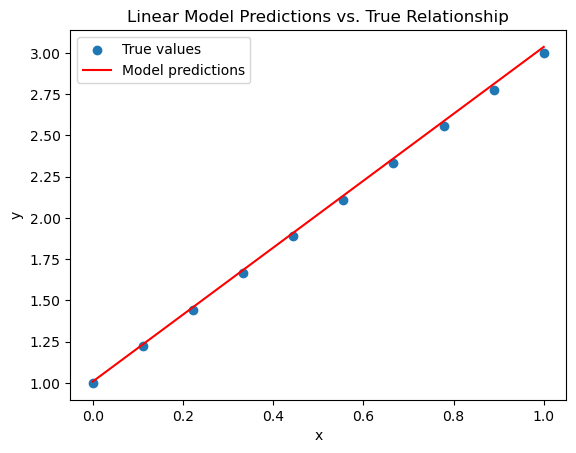

W: 2.028, b: 1.009


In [29]:
# Generate test data (x values between 0 and 1).
# We use linspace to create a smooth line for the true relationship.
x_test = jnp.linspace(0, 1, 10).reshape(-1, 1)
y_test = 2 * x_test + 1 # Ground truth: linear function without noise.

# Get model predictions using the final trained parameters.
# We access the apply_fn and params stored in our TrainState object.
y_pred = state.apply_fn({"params": state.params}, x_test)

# Plotting the results
plt.scatter(x_test, y_test, label="True values")
plt.plot(x_test, y_pred, color="red", label="Model predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Model Predictions vs. True Relationship")
plt.show()

# Print the final learned parameters (weights and bias)
kernel = state.params['Dense_0']['kernel']
bias = state.params['Dense_0']['bias']
w = float(kernel[0, 0])
b = float(bias[0])
print(f"W: {w:.3f}, b: {b:.3f}")

##### Summary of Results

The model successfully reduced the loss from an initial 5.2768 down to a stable 0.0100. This indicates that the parameters $W$ and $b$ have been optimized to closely match the original coefficients (2 and 1).

---

### Bonus: Full Implementation of a Training Loop for a Quadratic Model

In the following section, we will build a training loop to train a model for $y = x^2 + 2x + 1 + noise$.

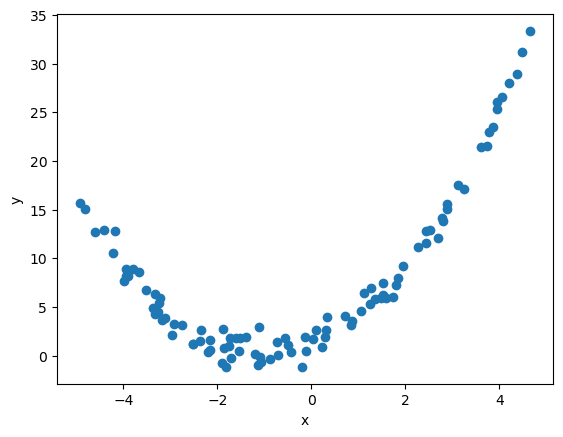

Initialized weights
: {'params': {'Dense_0': {'kernel': Array([[-0.36912927],
       [-0.89865476]], dtype=float32), 'bias': Array([0.], dtype=float32)}}}
Loss at iteration zero: 373.61834716796875
Epoch: 0, Loss: 373.61834716796875
Epoch: 10, Loss: 87.87062072753906
Epoch: 20, Loss: 3.8061821460723877
Epoch: 30, Loss: 7.18076229095459
Epoch: 40, Loss: 5.577726364135742
Epoch: 50, Loss: 1.4756265878677368
Epoch: 60, Loss: 1.395775318145752
Epoch: 70, Loss: 1.26826810836792
Epoch: 80, Loss: 1.0718647241592407
Epoch: 90, Loss: 1.0710933208465576
Epoch: 100, Loss: 1.039793848991394
Epoch: 110, Loss: 1.0273172855377197
Epoch: 120, Loss: 1.018871545791626
Epoch: 130, Loss: 1.0118361711502075
Epoch: 140, Loss: 1.0071830749511719


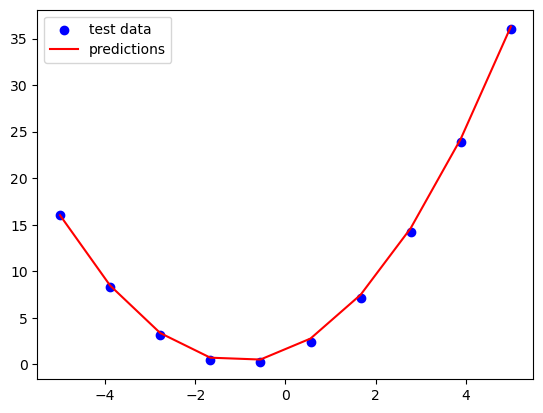

Test loss: 0.08189428597688675


In [ ]:
import jax
import matplotlib.pyplot as plt
from flax import linen as nn
from jax import numpy as jnp
from flax.training import train_state
import optax


# 1. Define the train dataset.
## Create random key.
key = jax.random.PRNGKey(42)
key, data_key, noise_key = jax.random.split(key, 3)

## Generate x and y data.
x_data = jax.random.uniform(shape=(100, 1), minval=-5, maxval=5, key=data_key)
noise = jax.random.normal(key=noise_key, shape=(100, 1))
y_data = x_data ** 2 + 2 * x_data + 1 + noise

## Visualize the dataset
plt.scatter(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Engineer features to capture quadratic relationship between features and labels
X_data = jnp.concatenate([x_data, x_data ** 2], axis=1)


# 2. Define a model.
## Define a custom class that inherits from nn.Module.
class LinearModel(nn.Module):

    @nn.compact
    def __call__(self, x):
        return nn.Dense(features=1)(x) # one output unit for regression

## Instantiate the model.
model2 = LinearModel()

## Initialize the weights with random numbers
rng = jax.random.PRNGKey(42)
variables = model2.init(rng, jnp.ones([1,2])) # input shape is (1,2) because we have 2 features (x and x^2)
print(f'Initialized weights\n: {variables}')


# 3. Create a training state.
## Define the optimizer.
tx = optax.adam(learning_rate=0.1)

## Create the state.
state = train_state.TrainState.create(
    apply_fn=model2.apply,          # Forward pass function
    params=variables['params'],     # Initialized model parameters
    tx=tx                           # optimizer for back prop
)


# 4. Define a explicit loss function
def calculate_loss(params, x, y):

    preds = model2.apply({'params': params}, x)
    return jnp.mean((preds - y) ** 2)

loss = calculate_loss(variables['params'], X_data, y_data)
print(f'Loss at iteration zero: {loss}')


# 5. Define a training step.
## Use closure
@jax.jit
def train_step(state, x, y):

    def compute_loss(params):
        preds = state.apply_fn({'params': params}, x)
        loss = jnp.mean((preds - y) ** 2)
        return loss, preds
    
    (loss, predictions), grads = jax.value_and_grad(compute_loss, has_aux=True, )(state.params)
    state = state.apply_gradients(grads=grads)

    return state, (loss, predictions)


# 6. Define training loop.
num_epochs = 150
for epoch in range(num_epochs):
    
    state, (loss, _) = train_step(state, X_data, y_data)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}")


# 7. Test you model
## Create test data.
x_test = jnp.linspace(-5, 5, 10).reshape(-1, 1)
X_test = jnp.concatenate([x_test, x_test**2], axis=1)
y_test = x_test ** 2 + 2 * x_test + 1

## Make predictions on the test data
y_pred = state.apply_fn({'params': state.params}, X_test)

## Visualize the predicted data
plt.scatter(x_test, y_test, label='test data', color='blue')
plt.plot(x_test, y_pred, label='predictions', color='red')
plt.legend()
plt.show()

## Calculate test loss
train_loss = jnp.mean((y_pred - y_test) ** 2)
test_loss = jnp.mean((y_pred - y_test) ** 2)

print(f'Test loss: {test_loss}')

---

### Bonus: Difference between `linen.nn` and `nnx` by an example

In the JAX ecosystem, **Linen** (the traditional Flax API) and **NNX** (the newer, experimental Flax API) represent two fundamentally different philosophies for building neural networks.

The primary difference lies in how they handle *State* (the weights, biases, and batch stats).


#### The Core Philosophical Difference

* **Linen: Purely Functional:** Linen follows JAX’s functional purity strictly. A `Linen` module is just a set of instructions; it *does not store data*.
    * **The Model:** A stateless blueprint.
    * **The State:** A separate, immutable dictionary (`params`).
    * **The Workflow:** You must pass the variables into the model every time you call it: `model.apply(variables, x)`.

* **NNX: Object-Oriented JAX:** NNX introduces a "Reference-based" approach that feels much more like PyTorch or standard Python classes, while still being compatible with JAX transformations.
    * **The Model:** An object that actually holds its own state.
    * **The State:** Attributes of the class (e.g., `self.kernel`).
    * **The Workflow:** You call the model directly: `model(x)`.

#### Side-by-Side Code Comparison

* **Flax Linen (Functional):**

    ```python
    import flax.linen as nn

    class LinearLinen(nn.Module):
        @nn.compact
        def __call__(self, x):
            return nn.Dense(1)(x)

    model = LinearLinen()
    variables = model.init(rng, x)  # Returns a dict
    out = model.apply(variables, x) # Must pass variables back in

    ```

* **Flax NNX (Stateful/Object-Oriented)**

    ```python
    from flax import nnx

    class LinearNNX(nnx.Module):
        def __init__(self, din, dout, rngs):
            self.dense = nnx.Linear(din, dout, rngs=rngs)

        def __call__(self, x):
            return self.dense(x)

    model = LinearNNX(1, 1, rngs=nnx.Rngs(0)) # Model owns its parameters
    out = model(x)                             # Call like a normal function

    ```

#### Key Differences Table

| Feature | Flax Linen | Flax NNX |
| --- | --- | --- |
| **State Management** | **Stateless**: Params are in a separate dict. | **Stateful**: Params are attributes of the object. |
| **Transformations** | Use `jax.jit(model.apply)`. | Use `nnx.jit(model)`. |
| **Shape Inference** | Excellent (via `@nn.compact`). | More explicit (usually defined in `__init__`). |
| **Initialization** | Requires a "dummy" forward pass. | Standard Python initialization. |
| **Complexity** | Higher "boilerplate" for state management. | Lower boilerplate; feels like PyTorch. |


#### Why NNX is developed?

Linen is mathematically beautiful but can be mentally taxing for complex architectures (like GANs or models with many moving parts) because you are constantly piping dictionaries through functions. NNX was designed to:

* Make it easier for developers coming from PyTorch/Keras.
* Allow objects to track their own state (like optimizer state or RNG counters) internally.
* It uses a clever "functionalization" process under the hood so that it still plays perfectly with `jax.grad` and `jax.jit`.

#### Which one should we use?

* **Use Linen:** If you prefer the absolute clarity of "data in, data out" functional programming.
* **Use NNX:** If you find the dictionary-passing in Linen tedious and want a more modern, object-oriented feel that is likely the future of the Flax ecosystem.